In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# Load the dataset
df = pd.read_csv('/content/news_articles.csv')

In [4]:
print(df.head())

   word_count  has_keywords  read_time  category
0         142             0          3      tech
1        1043             0          6  business
2         442             1         12    sports
3        1449             1         13      tech
4        1937             1         10      tech


In [5]:
print(df.shape)

(100, 4)


In [6]:
print(df.describe())

        word_count  has_keywords   read_time
count   100.000000    100.000000  100.000000
mean   1026.770000      0.480000    7.090000
std     548.291632      0.502117    3.990127
min     101.000000      0.000000    1.000000
25%     539.500000      0.000000    4.000000
50%    1054.500000      0.000000    6.500000
75%    1469.500000      1.000000   10.250000
max    1945.000000      1.000000   14.000000


In [7]:
print(df.dtypes)

word_count       int64
has_keywords     int64
read_time        int64
category        object
dtype: object


In [8]:
# Encode target labels
label_encoder = LabelEncoder()
df['category_encoded'] = label_encoder.fit_transform(df['category'])

In [13]:
# Features and target
X = df[['word_count', 'has_keywords', 'read_time']]
y = df['category_encoded']

In [14]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [16]:
# Generate Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

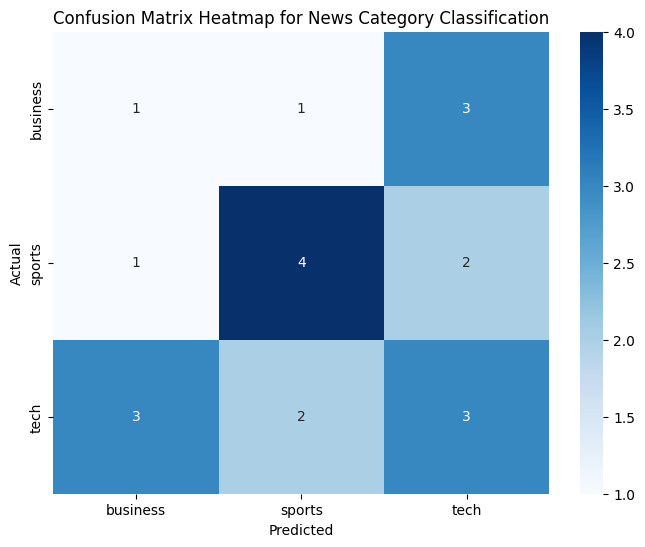

In [17]:
#Plot Confusion Matrix Heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d',
            xticklabels=label_encoder.classes_,
            yticklabels=label_encoder.classes_,
            cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix Heatmap for News Category Classification')
plt.show()

In [18]:
# Calculate Evaluation Metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')

In [19]:
# Print Evaluation Results
print(f"Accuracy: {accuracy * 100:.2f}%")
print(f"Precision: {precision * 100:.2f}%")
print(f"Recall: {recall * 100:.2f}%")

Accuracy: 40.00%
Precision: 40.00%
Recall: 40.00%
